In [2]:
import numpy as np
from sklearn.datasets import load_sample_image

import tensorflow as tf

import matplotlib.pyplot as plt

In [3]:
# load sample images
china = load_sample_image("china.jpg")
flower = load_sample_image("flower.jpg")

print type(china)
print china.shape
print china

dataset = np.array([china, flower], dtype=np.float32)

batch_size, height, width, channels = dataset.shape

/Users/sashank/Documents/machine-learning/env/lib/python2.7/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
/Users/sashank/Documents/machine-learning/env/lib/python2.7/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
/Users/sashank/Documents/machine-learning/env/lib/python2.7/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
/Users/sashank/Documents/machine-learning/env/lib/python2.7/site-packages/sklearn/dat

<type 'numpy.ndarray'>
(427, 640, 3)
[[[174 201 231]
  [174 201 231]
  [174 201 231]
  ..., 
  [250 251 255]
  [250 251 255]
  [250 251 255]]

 [[172 199 229]
  [173 200 230]
  [173 200 230]
  ..., 
  [251 252 255]
  [251 252 255]
  [251 252 255]]

 [[174 201 231]
  [174 201 231]
  [174 201 231]
  ..., 
  [252 253 255]
  [252 253 255]
  [252 253 255]]

 ..., 
 [[ 88  80   7]
  [147 138  69]
  [122 116  38]
  ..., 
  [ 39  42  33]
  [  8  14   2]
  [  6  12   0]]

 [[122 112  41]
  [129 120  53]
  [118 112  36]
  ..., 
  [  9  12   3]
  [  9  15   3]
  [ 16  24   9]]

 [[116 103  35]
  [104  93  31]
  [108 102  28]
  ..., 
  [ 43  49  39]
  [ 13  21   6]
  [ 15  24   7]]]


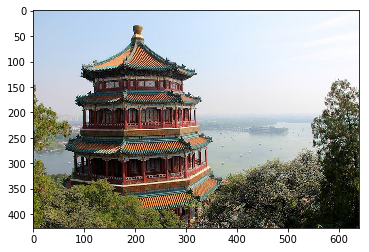

In [19]:
plt.imshow(china) 
plt.show()

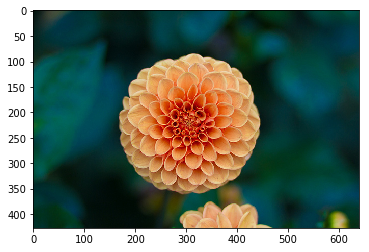

In [20]:
plt.imshow(flower) 
plt.show()

In [5]:
# create 2 filters
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1 # vertical filter
filters[3, :, :, 1] = 1 # horizontal filter


In [8]:
# create a graph with input X plus a convolution layer applying the 2 filters

X = tf.placeholder(tf.float32, shape=(None, height, width, channels))
convolution = tf.nn.conv2d(X, filters, strides=[1, 2, 2, 1], padding="SAME")


In [9]:
with tf.Session() as sess:
    output = sess.run(convolution, feed_dict={X: dataset})

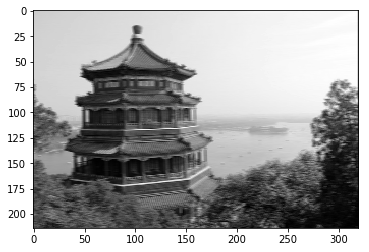

In [12]:
# plot 1st image's 2nd feature map - horizontal filter
plt.imshow(output[0, :, :, 1], cmap="gray") 
plt.show()

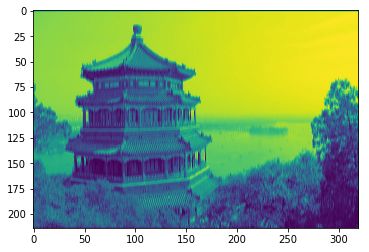

In [17]:
# plot 1st image's 1st feature map - vertical filter
plt.imshow(output[0, :, :, 0]) 
plt.show()

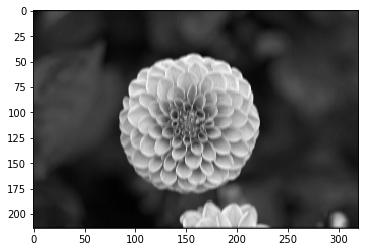

In [14]:
# plot 2nd image's 1st feature map - vertical filter
plt.imshow(output[1, :, :, 0], cmap="gray") 
plt.show()

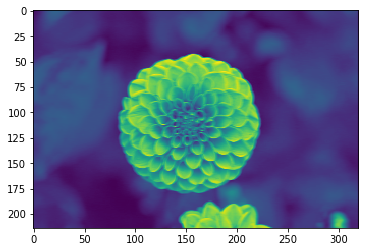

In [18]:
# plot 2nd image's 2nd feature map - horizontal filter
plt.imshow(output[1, :, :, 1]) 
plt.show()